In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid") 

# Load the Car Evaluation dataset
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
# column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# car_data = pd.read_csv(url, names=column_names)

data = pd.read_csv("car.data")
print(data.columns)
print(data.head())

# Preprocess the data
# # Define the categorical columns
# X = list(data.columns)[:6]
# data.columns: ['buying', ' maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# categorical_columns: ['buying', ' maint', 'doors', 'persons', 'lug_boot', 'safety']

X = data[['buying', ' maint', 'doors', 'persons', 'lug_boot', 'safety']].values

label_encoder = LabelEncoder()
for i in range(len(X[0])):
    X[:,i]=label_encoder.fit_transform( X[:,i])

# Map the labels in the 'class' column using the predefined mapping 
# Fill NaN with 0 but not 0.0
label_mapping = {'uacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
data['class'] = data['class'].map(label_mapping).fillna(0).astype(int)
y=data['class']



Index(['buying', ' maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.838150289017341


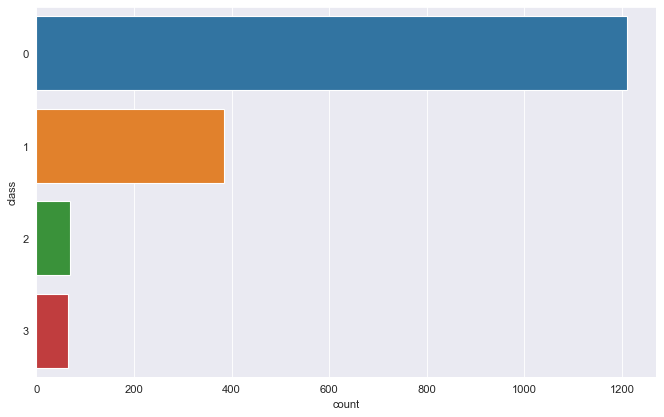

In [70]:
plt.figure(figsize=(10, 6), dpi=80)
# sns.countplot(y=data[" maint"])
# sns.countplot(y=data["buying"])
sns.countplot(y=data["class"])
# sns.countplot(y=data["doors"])
# sns.countplot(y=data["lug_boot"])
# sns.countplot(y=data["persons"])
# sns.countplot(y=data["safety"])
plt.show()